# Was 2018 an Exceptional Year for Louisville's Rainfall?

2018 was a record year for Louisville with over 66 inches of rainfall. We will dive in to the numbers to determine if 2018 was truely an extreme year rainfall in Louisville.

Here, we import our dependecies to so that we can start our analysis by reading our CSV of all recorded rainfall data for Louisville(source National Weather Service - NOW Data https://w2.weather.gov/climate/xmacis.php?wfo=lmk) and then perform some basic statistical analysis.

In [341]:
import os
import csv
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy.stats

plt.figure(figsize = (20, 10))
plt.style.use('classic');

<Figure size 1600x800 with 0 Axes>

To import Louisville's rainfall data for analysis, we will first assign the working directory of this project to the directory variable.. By using the os.getcwd() method, the path obtained will be relative so that anyone can clone the project and run it without changes.

In [356]:
directory = os.getcwd()
print(directory)

C:\Users\rcsall11\LouisvilleRain


Our rainfall data is stored in the \RainSourceData subdirectory so we will add it to the directory variable to effectively change the working directory.

In [357]:
directory += "\RainSourceData"
print(directory)

C:\Users\rcsall11\LouisvilleRain\RainSourceData


The data is stored in "louisville_rain_data.csv" and we will assign the directory variable plus the name of the CSV to a new variable, filename. This continues the pattern of using a relative filepath.

In [142]:
filename = directory + "\louisville_rain_data.csv"
print(filename)

C:\Users\rcsall11\LouisvilleRain\RainSourceData\louisville_rain_data.csv


Now, the rainfall data for Louisville, stored in CSV format, can be read using the read_csv method from pandas and converted to a dataframe that we can manipulate and use for the analysis of Louisville's rainfall in 2018.

In [143]:
df_louisville = pd.read_csv(filename)
df_louisville.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1872,M,M,M,M,M,M,M,2.45,4.38,3.92,0.56,2.35
1,1873,2.93,5.42,3.39,3.05,5.73,2.84,3.43,3.04,2.47,3.26,2.19,6.99
2,1874,2.39,5.18,6.63,6.01,1.14,2.95,2.83,3.23,0.62,2.04,5.90,4.77
3,1875,2.42,2.09,4.54,0.98,4.07,5.79,16.46,2.19,1.05,1.92,6.14,5.67
4,1876,11.63,2.92,6.01,4.5,1,6.52,3.61,4.29,2.66,7.61,1.63,1.24


In [144]:
df_louisville.to_sql("louisville_rain_table", sqlite3.connect("louisville_rain.db"), if_exists = "replace")
db_lou = sqlite3.connect("louisville_rain.db")

In [145]:
lou_sum_query ="""
                SELECT Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, SUM(Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Nov + Dec)  AS Total
                FROM louisville_rain_table
                GROUP BY Year
                """

df_louisville = pd.read_sql_query(lou_sum_query, db_lou)
df_louisville.set_index('Year', inplace = True)
df_louisville.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
1872,M,M,M,M,M,M,M,2.45,4.38,3.92,0.56,2.35,9.74
1873,2.93,5.42,3.39,3.05,5.73,2.84,3.43,3.04,2.47,3.26,2.19,6.99,41.48
1874,2.39,5.18,6.63,6.01,1.14,2.95,2.83,3.23,0.62,2.04,5.90,4.77,41.65
1875,2.42,2.09,4.54,0.98,4.07,5.79,16.46,2.19,1.05,1.92,6.14,5.67,51.40
1876,11.63,2.92,6.01,4.5,1,6.52,3.61,4.29,2.66,7.61,1.63,1.24,46.01


In [146]:
df_louisville.dtypes

Jan       object
Feb       object
Mar       object
Apr       object
May       object
Jun       object
Jul       object
Aug      float64
Sep      float64
Oct      float64
Nov      float64
Dec      float64
Total    float64
dtype: object

In [353]:
df_louisville = df_louisville.apply(pd.to_numeric, downcast ="float", errors="coerce")
df_louisville.dtypes

Jan      float32
Feb      float32
Mar      float32
Apr      float32
May      float32
Jun      float32
Jul      float32
Aug      float32
Sep      float32
Oct      float32
Nov      float32
Dec      float32
Total    float32
dtype: object

In [148]:
df_louisville.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.45,4.38,3.92,0.56,2.35,9.740000
1873,2.93,5.42,3.39,3.05,5.73,2.84,3.430000,3.04,2.47,3.26,2.19,6.99,41.480000
1874,2.39,5.18,6.63,6.01,1.14,2.95,2.830000,3.23,0.62,2.04,5.90,4.77,41.650002
1875,2.42,2.09,4.54,0.98,4.07,5.79,16.459999,2.19,1.05,1.92,6.14,5.67,51.400002
1876,11.63,2.92,6.01,4.50,1.00,6.52,3.610000,4.29,2.66,7.61,1.63,1.24,46.009998


In [149]:
df_louisville.dropna(inplace = True)
df_louisville.loc['Mean'] = df_louisville.mean(axis =0)
df_louisville.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
2015,0.870000,2.230000,7.800000,10.840000,2.380000,6.820000,8.650000,3.470000,2.450000,4.850000,5.470,6.580000,57.560001
2016,1.010000,4.810000,5.500000,3.180000,4.560000,4.250000,4.650000,5.710000,2.280000,0.650000,1.650,5.300000,42.900002
2017,4.210000,2.060000,3.680000,4.470000,4.740000,3.260000,2.790000,4.200000,5.470000,4.890000,2.060,2.730000,39.669998
2018,1.760000,10.540000,5.050000,3.400000,4.980000,6.380000,5.130000,7.230000,10.910000,2.790000,4.760,5.900000,66.040001
Mean,3.723724,3.371448,4.574482,4.129103,4.264689,3.930138,3.910344,3.359104,2.997242,2.826552,3.522,3.764207,41.546482


In [354]:
louisvilleTotalRainFallSeries = df_louisville['Total']
louisvilleTotalRainFallMean = louisvilleTotalRainFallSeries[-1]
louisvilleTotalRainFall2018 = louisvilleTotalRainFallSeries[-2]
louisville2018RainFallVarience = (louisvilleTotalRainFall2018 - louisvilleTotalRainFallMean)
louisville2018RainFallVarience

24.493519

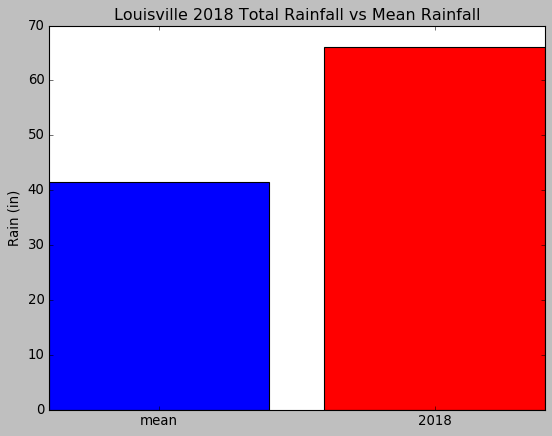

In [345]:
objects = ("mean", "2018")
color = ["blue", "red"]
plt.bar(objects,[louisvilleTotalRainFallMean, louisvilleTotalRainFall2018], color = color, align = "center")
plt.title("Louisville 2018 Total Rainfall vs Mean Rainfall")
plt.ylabel("Rain (in)")
plt.show()

24.493519

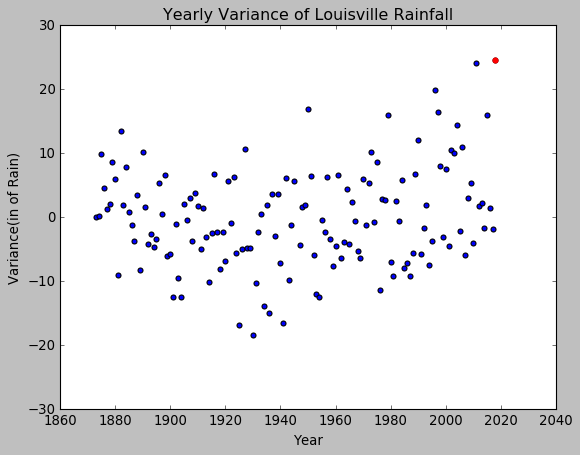

In [333]:
years = []
variances = []
for i, r in louisvilleTotalRainFallSeries[0:-1].items():
    years.append(i)
    variances.append(r-louisvilleTotalRainFallMean)
    
plt.scatter(years, variances)
plt.scatter(years[-1], variances[-1], color = "red")
plt.xlabel("Year")
plt.ylabel("Variance(in of Rain)")
plt.title("Yearly Variance of Louisville Rainfall")
plt.show()

In [197]:
louisvilleTotalRainFallList = []
louisvilleTotalRainFallList = louisvilleTotalRainFallSeries.tolist()
louisvilleTotalRainFallList.pop()

41.54648208618164

In [198]:
louMeanStdDev = statistics.stdev(louisvilleTotalRainFallList)
louMeanStdDev

7.892217065062169

In [256]:
zScoreLou=louisville2018RainFallVarience/louMeanStdDev
print(zScoreLou)
#z-score

3.1035029355408086


In [261]:
p_value = 1 - scipy.special.ndtr(zScoreLou)
print(p_value * 100)

0.09562216883818309


In [183]:
q75Lou,  q25Lou = np.percentile(louisvilleTotalRainFallList, [75, 25])
iqrLouisville = q75Lou - q25Lou
iqrLouisville

10.359996795654297

In [193]:
louisvilleTotalRainFall2018 > (q75Lou + 1.5*iqrLouisville)

True

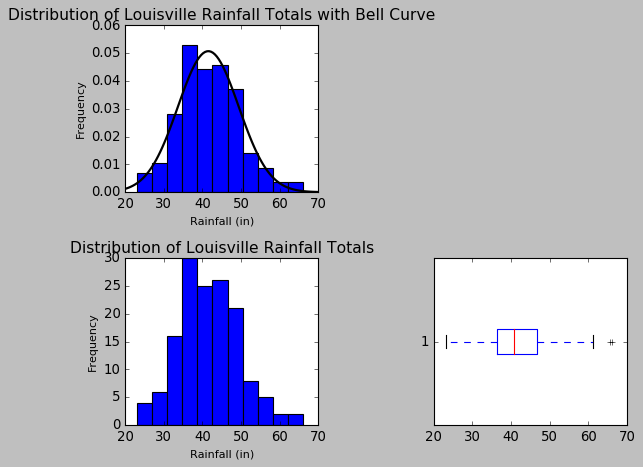

In [351]:
plt.subplot(2, 2, 1)
plt.hist(louisvilleTotalRainFallList, 'auto', density = 'True')
plt.title("Distribution of Louisville Rainfall Totals with Bell Curve", fontsize = 14)
plt.xlabel("Rainfall (in)", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)

mu, std = norm.fit(louisvilleTotalRainFallList)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(2,2,3)
plt.hist(louisvilleTotalRainFallList, 'auto')
plt.title("Distribution of Louisville Rainfall Totals", fontsize = 14)
plt.xlabel("Rainfall (in)", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)

plt.subplot(2,2,4)
plt.boxplot(louisvilleTotalRainFallList, vert = False)

plt.tight_layout()
plt.show()

C:\Users\rcsall11\LouisvilleRain\RainSourceData
